1) Load the Dataset

In [53]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [54]:
#  ➢Readthemarketing campaign data from the CSV file into a pandas DataFrame.
df = pd.read_csv(r"D:\DS&ML\Python\Python Capstone Project - Marketing Campaign Performance Insights\Dataset\marketing_campaign.csv")

2) Descriptive Analysis
 
Basic Structure:

In [55]:
# ➢ Print the first few rows of the dataset to get an overview of the data.
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [56]:
# ➢ Obtain the number of rows and columns in the dataset.
shape_df = df.shape
print ("no. of rows :",shape_df[0],"\n no. of columns :",shape_df[1])

no. of rows : 22029 
 no. of columns : 16


In [57]:
# ➢ Get a concise summary of the dataset, including the data types and non-null values.
df.info

<bound method DataFrame.info of        Campaign_ID              Company Campaign_Type Target_Audience  \
0                1             TechCorp         Email     Women 25-34   
1                2  Innovate Industries    Influencer     Women 35-44   
2                3       NexGen Systems  Social Media     Women 25-34   
3                4  Innovate Industries         Email     Women 25-34   
4                5  Data Tech Solutions    Influencer       Men 25-34   
...            ...                  ...           ...             ...   
22024        22025  Data Tech Solutions        Search       Men 18-24   
22025        22026  Data Tech Solutions  Social Media       Men 18-24   
22026        22027             TechCorp    Influencer     Women 25-34   
22027        22028  Data Tech Solutions        Search       Men 18-24   
22028        22029       NexGen Systems        Search       Men 18-24   

      Duration Channel_Used  Conversion_Rate  Acquisition_Cost     ROI  \
0      30 days   

In [58]:
# ➢ Generate descriptive statistics for numerical columns.
df.select_dtypes(exclude='O').describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


Data Eploration:

In [59]:
# ➢ Print the number of unique Campaign_ID values in the dataset.
print("No.of unique values :",len(df['Campaign_ID'].unique()))

# ➢ List the unique values of the Location and Customer_Segment columns.
Location_unique = list(df['Location'].unique())
print("\nUnique Locations :",Location_unique)

Customer_Segment_unique = list(df['Customer_Segment'].unique())
print("\nUnique Customer Segment :",Customer_Segment_unique)

# ➢ Count the occurrences of each category in the Campaign_Type and Channel_Used and columns.
print("\nCampaign Type's Value Count :\n",df.Campaign_Type.value_counts())
print("\nChannel Used Column's Value Count :\n",df.Channel_Used.value_counts())

No.of unique values : 22029

Unique Locations : ['Houston', 'Washington, D.C.', 'Miami', 'Seattle', 'Chicago', 'Los Angeles', 'Atlanta', 'Dallas', 'New York', 'San Francisco']

Unique Customer Segment : ['Tech Enthusiasts', 'Foodies', 'Fashionistas', 'Outdoor Adventurers', 'Health & Wellness']

Campaign Type's Value Count :
 Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

Channel Used Column's Value Count :
 Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


3) Exploratory Data Analysis (EDA) and Visualization

Campaign Performance:

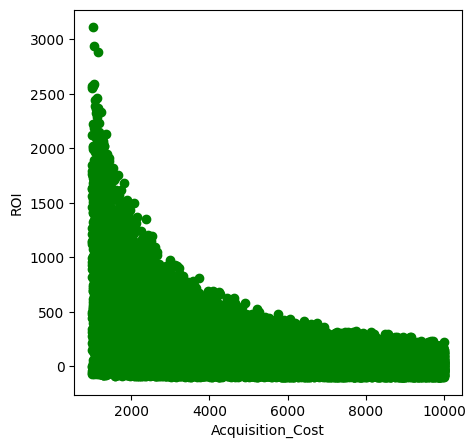

In [60]:
# ➢ Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI.
plt.figure(figsize=(5,5))
plt.scatter(x=df['Acquisition_Cost'], y=df['ROI'], color='green')
plt.xlabel('Acquisition_Cost')
plt.ylabel('ROI')
plt.show()


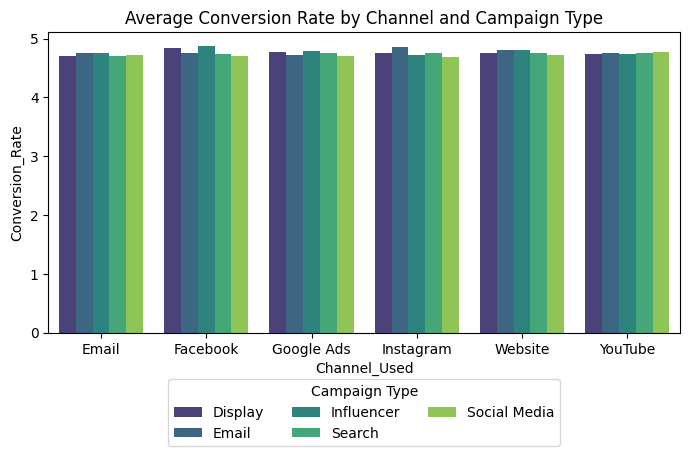

In [61]:
# ➢ Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type.

avrg = df.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(7,5))
plt.title("Average Conversion Rate by Channel and Campaign Type")
sns.barplot(data=avrg ,x = "Channel_Used" , y = "Conversion_Rate", hue= 'Campaign_Type',palette="viridis")
plt.legend(title='Campaign Type', loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)
plt.tight_layout()

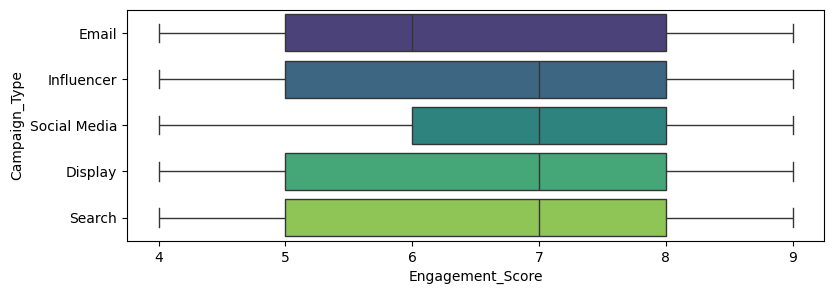

In [ ]:
# ➢ Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot.

plt.figure(figsize=(9, 3))
sns.boxplot(data=df, y='Campaign_Type', x='Engagement_Score', palette='viridis') 
plt.show()


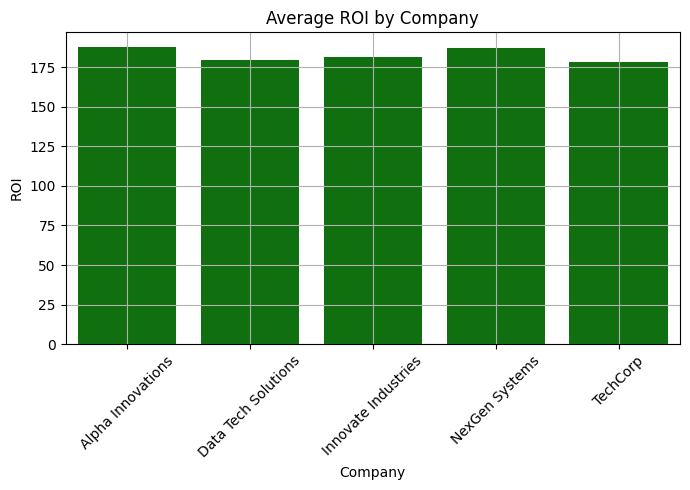

In [78]:
# ➢ Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies.

avrg_roi = df.groupby('Company')['ROI'].mean()
avrg_roi = pd.DataFrame(avrg_roi)

plt.figure(figsize=(7,5))
sns.barplot(data=avrg_roi,x='Company',y='ROI',color = 'green')
plt.xticks(rotation=45)
plt.title('Average ROI by Company')
plt.grid(True)
plt.tight_layout()


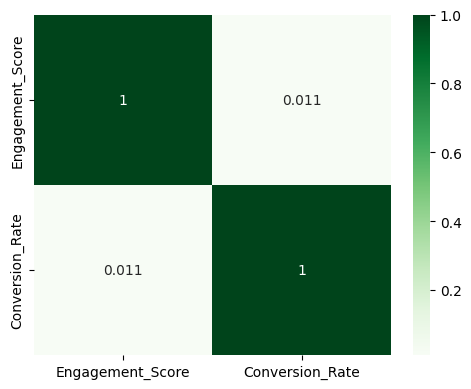

In [81]:
# ➢ Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap.
plt.figure(figsize=(5,4))
corr_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.tight_layout()
plt.show()

Customer Segmentation:

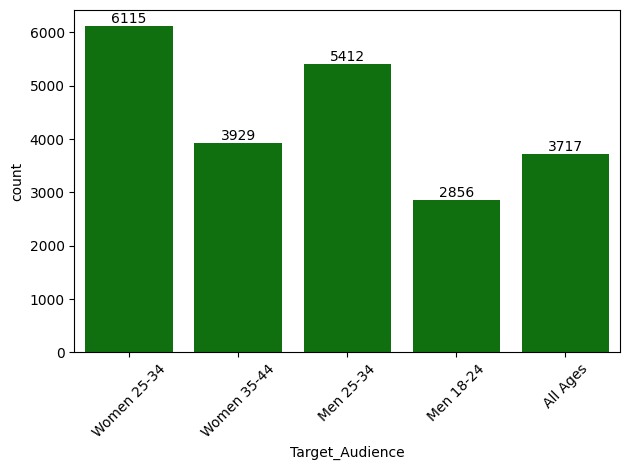

In [82]:
# ➢ Create a count plot to visualize the distribution of Target_Audience.

ax=sns.countplot(data=df,x='Target_Audience',color= 'green')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()

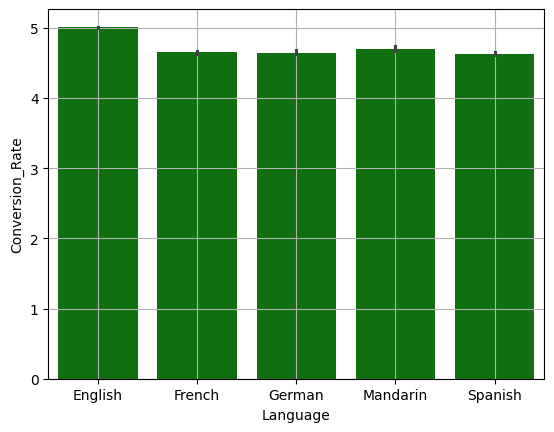

In [83]:
# ➢ Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart.

con_rate_lan = df.groupby(['Customer_Segment','Language'])['Conversion_Rate'].mean().reset_index()
con_rate_lan = pd.DataFrame(con_rate_lan)

sns.barplot(data=con_rate_lan,x='Language', y='Conversion_Rate',color='green')
plt.grid(True)


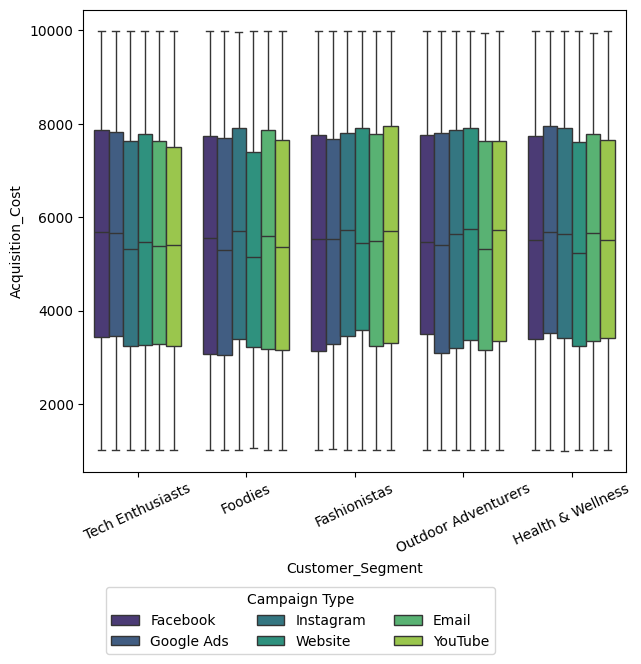

In [67]:
# ➢ Visualize the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot.
 
plt.figure(figsize=(7,6))
sns.boxplot(data=df,x='Customer_Segment',y='Acquisition_Cost',hue='Channel_Used',palette='viridis')
plt.xticks(rotation=25)
plt.legend(title='Campaign Type', loc='lower center', bbox_to_anchor=(.4, -0.41), ncol=3)
plt.show()

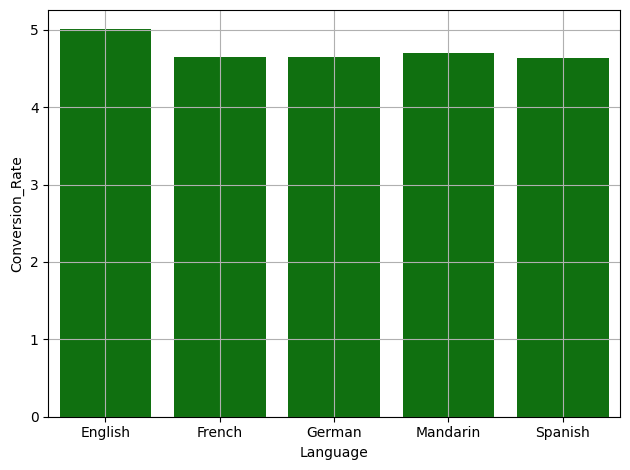

In [84]:
# ➢ Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages

avrg_con_rate = df.groupby('Language')['Conversion_Rate'].mean().reset_index()
avrg_con_rate = pd.DataFrame(avrg_con_rate)

sns.barplot(data=avrg_con_rate,x='Language',y='Conversion_Rate',color='green')
plt.grid(True)
plt.tight_layout()

Channel Effectivenes:

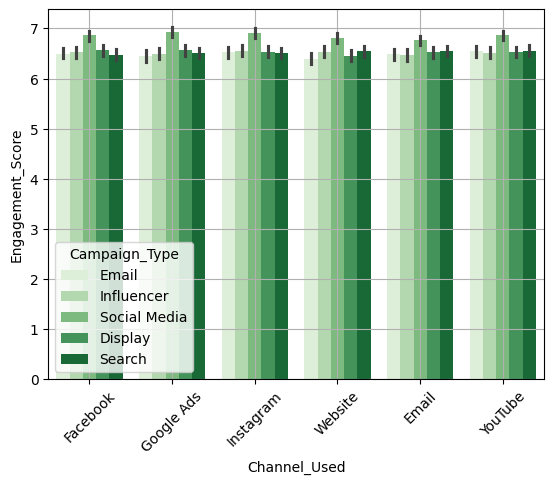

In [85]:
# ➢ Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.

sns.barplot(data=df, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', palette='Greens')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


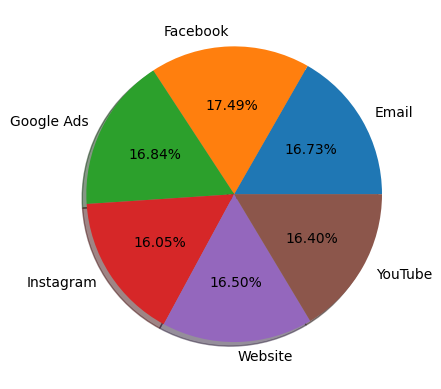

In [70]:
# ➢ Show the distribution of total ROI across different Channels_Used using a pie chart.

chnl_roi = df.groupby('Channel_Used')['ROI'].sum().reset_index()

plt.pie(data=chnl_roi,x='ROI',labels='Channel_Used',autopct='%1.2f%%',shadow=True)
plt.show()

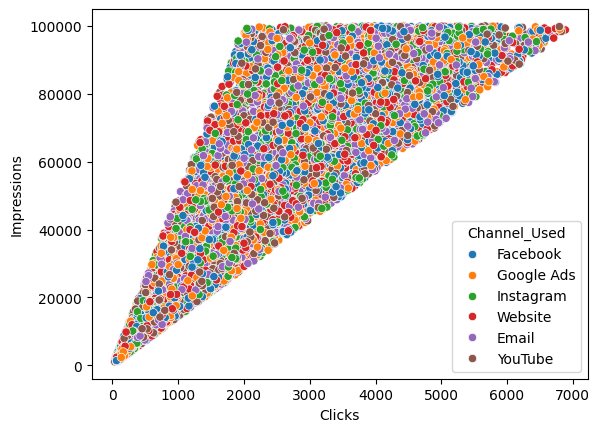

In [71]:
# ➢ Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used.

sns.scatterplot(data=df,x='Clicks',y='Impressions',hue='Channel_Used')
plt.show()

Time-Based Analysis:

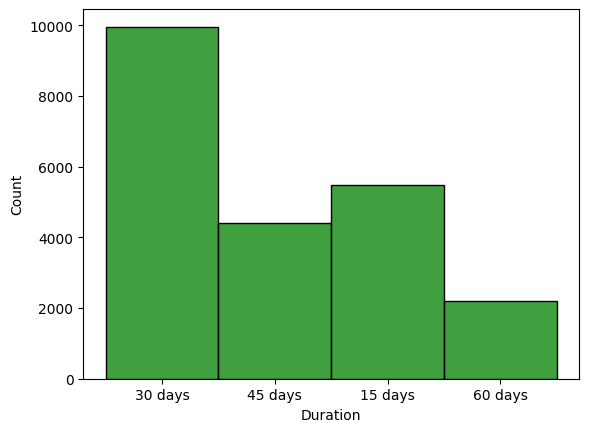

In [86]:
# ➢ Plot the distribution of Duration using a histogram.

sns.histplot(df.Duration,color='green')
plt.show()

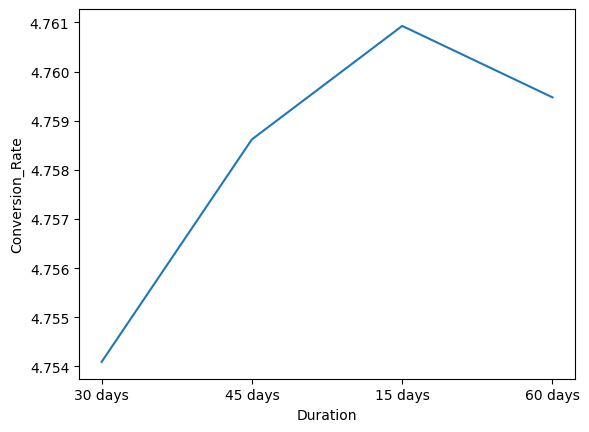

In [73]:
# ➢ Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart.

sns.lineplot(data=df,x='Duration',y='Conversion_Rate',errorbar=None)
plt.show()

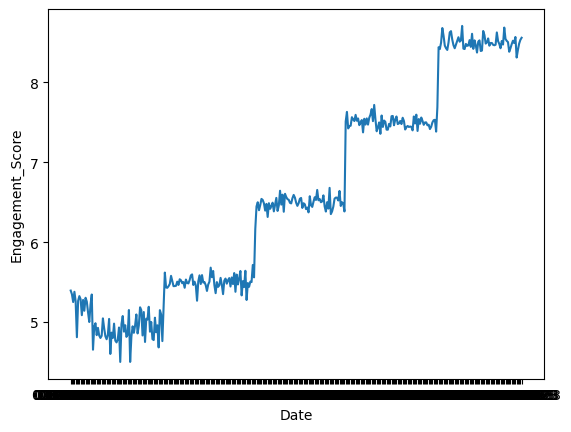

In [ ]:
# ➢ Examine the trend of Engagement_Score over Date with a line chart.

sns.lineplot(data=df,x='Date',y='Engagement_Score',errorbar=None)
plt.show()

Geographic Analysis:

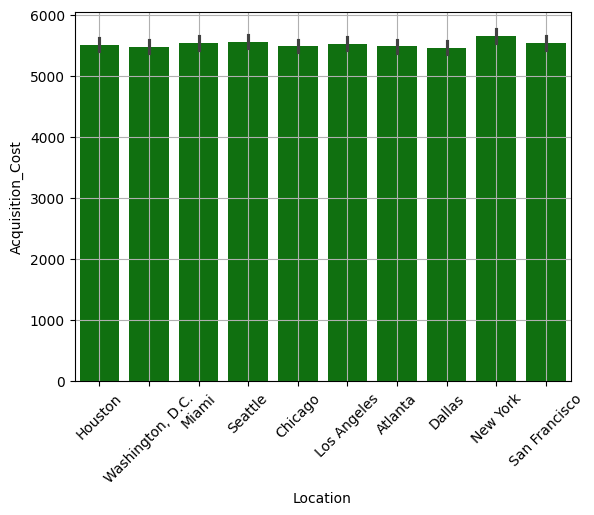

In [87]:
# ➢ Determine which location has the highest Acquisition_Cost using a bar chart.

sns.barplot(data=df,x='Location',y='Acquisition_Cost',color='green')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

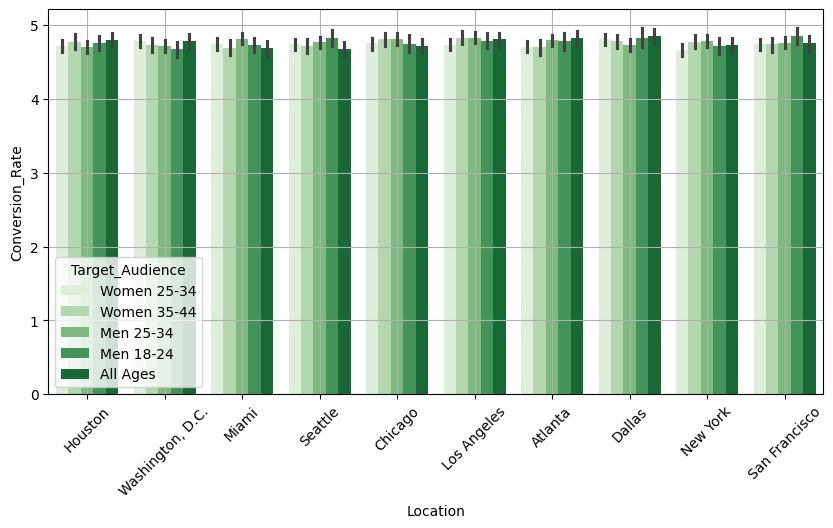

In [89]:
# ➢ Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart.

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Location', y='Conversion_Rate', hue='Target_Audience', palette='Greens')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


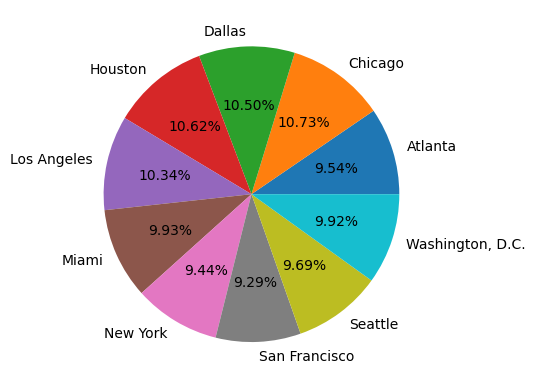

In [77]:
# ➢ Illustrate the proportion of ROI by Location using a pie chart.

loc_roi = df.groupby('Location')['ROI'].sum().reset_index()

plt.pie(data=loc_roi,x='ROI',labels='Location',autopct='%1.2f%%')
plt.show()
